In [2]:
import numpy as np
import pandas as pd

In [4]:
# get data

df = pd.read_csv("ecommerce_data.csv")
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


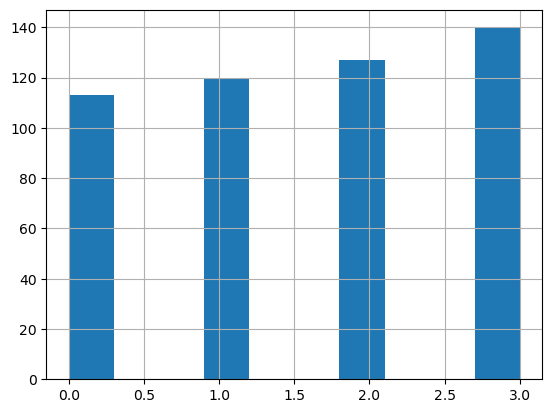

In [5]:
df["time_of_day"].hist();

In [6]:
def get_data():
    df = pd.read_csv("ecommerce_data.csv")
    # easier to work with numpy array
    data = df.to_numpy()
    # shuffle data
    np.random.shuffle(data)
    # split features and labels
    X = data[:, :-1]
    y = data[:, -1].astype(np.int32)
    
    # encode categorical data
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    # non-categorical columns
    X2[:, :(D-1)] = X[:, :(D-1)] 
    # hot-encode time of day categorical column
    for n in range(N):
        t = int(X[n, D-1])
        X2[n, t+D-1] = 1
        
    X = X2
    #split train and test sets
    Xtrain = X[:-100]
    ytrain = y[:-100]
    Xtest = X[-100:]
    ytest = y[-100:]
    
    # normalize columns 1 and 2
    for i in (1,2):
        m = Xtrain[:, i].mean()
        s = Xtrain[:, i].std()
        Xtrain[:, i] = (Xtrain[:, i] - m)/s
        Xtest[:, i] = (Xtest[:, i] - m)/s
        
    return Xtrain, ytrain, Xtest, ytest
    

In [7]:
Xtrain, ytrain, Xtest, ytest = get_data()

In [8]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((400, 8), (400,), (100, 8), (100,))

In [9]:
def get_binary_data():
    Xtrain, ytrain, Xtest, ytest = get_data()
    X2train = Xtrain[ytrain <= 1]
    y2train = ytrain[ytrain <= 1]
    X2test = Xtest[ytest <= 1]
    y2test = ytest[ytest <= 1]
    
    return X2train, y2train, X2test, y2test

In [10]:
X2train, y2train, X2test, y2test = get_binary_data()

In [11]:
X2train.shape, y2train.shape, X2test.shape, y2test.shape

((313, 8), (313,), (85, 8), (85,))

## Making predictions

In [12]:

X, Y, _, _ = get_binary_data()

In [13]:
# randomly initialize weights
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [14]:
# make predictions
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [15]:
def forward(X, W, b):
    return sigmoid(X.dot(W) + b)

In [16]:
P_Y_given_X = forward(X, W, b)

In [17]:
P_Y_given_X.shape

(316,)

In [18]:
predictions = np.round(P_Y_given_X)

In [19]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [20]:
print("Score:", classification_rate(Y, predictions))

Score: 0.7215189873417721


### Training the logistic model

In [21]:
import matplotlib.pyplot as plt

In [22]:
Xtrain, ytrain, Xtest, ytest = get_binary_data()

In [30]:
# randomly initialize weights
D = Xtrain.shape[1]
W = np.random.randn(D)
b = 0

In [31]:

# define cross-entropy loss function
def cross_entropy(Y, pY):
    return -np.mean(Y * np.log(pY) + (1 - Y) * np.log(1 - pY))

In [32]:
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10_000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(ytrain, pYtrain)
    ctest = cross_entropy(ytest, pYtest)
    
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate * Xtrain.T.dot(pYtrain - ytrain)
    b -= learning_rate * (pYtrain - ytrain).sum()
    
    if i%1000 == 0:
        print(i, ctrain, ctest)

0 0.8412543726690472 0.9766075641696974
1000 0.20587519850466315 0.11030576231453276
2000 0.20507551140103966 0.10682810586913752
3000 0.20504013511605051 0.10622759158181422
4000 0.20503824984386027 0.10609424481626187
5000 0.20503814540895327 0.10606311487230845
6000 0.2050381395719383 0.10605576790684183
7000 0.20503813924501413 0.10605402977706133
8000 0.2050381392266942 0.1060536183558012
9000 0.20503813922566755 0.10605352095962818


In [33]:
acc_train = classification_rate(ytrain, np.round(pYtrain))
print("Final train classification rate:", acc_train)
acc_test = classification_rate(ytest, np.round(pYtest))
print("Final test classification rate:", acc_test)

Final train classification rate: 0.9714285714285714
Final test classification rate: 0.9879518072289156


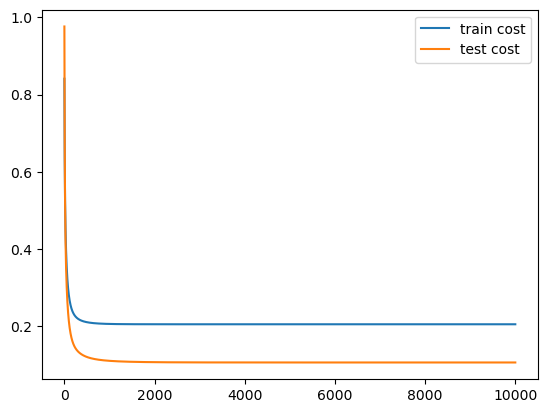

In [34]:
plt.plot(train_costs, label="train cost")
plt.plot(test_costs, label="test cost")
plt.legend();